In [32]:
import math
import numpy as np
import matplotlib.pyplot as plt

Вариант 17:
$$
\begin{equation*}
 \begin{cases}
   3⋅x_1-cosx_2=0\\
   3⋅x_2-e^{x_1}=0
 \end{cases}
\end{equation*}
$$

In [46]:
def f_show1(x2):
  return math.cos(x2)/3

In [47]:
def f_show2(x2):
  return math.log(3*x2)

In [27]:
def d_phi1(x2):
    return -math.sin(x2)/3

In [26]:
def d_phi2(x1):
    return math.exp(x1)/3

In [24]:
def phi2(x1):
    return math.exp(x1)/3

In [25]:
def phi1(x2):
    return math.cos(x2)/3

In [63]:
def f1(x1, x2):
    return 3*x1 - math.cos(x2)

In [62]:
def f2(x1, x2):
    return 3*x2 - math.exp(x1)

In [64]:
def d_1fun_x1(x1, x2):
    return 3

In [65]:
def d_1fun_x2(x1, x2):
    return math.sin(x2)

In [66]:
def d_2fun_x1(x1, x2):
    return - math.exp(x1)

In [67]:
def d_2fun_x2(x1, x2):
    return 3

In [12]:
def det_a1(x1, x2):
    return f1(x1, x2) * d_2fun_x2(x1, x2) - f2(x1, x2) * d_1fun_x2(x1, x2)

In [13]:
def det_a2(x1, x2):
    return f2(x1, x2) * d_1fun_x1(x1, x2) - f1(x1, x2) * d_2fun_x1(x1, x2)

In [14]:
# Якобиан
def det_J(x1, x2):
    return d_1fun_x1(x1, x2) * d_2fun_x2(x1, x2) - d_2fun_x1(x1, x2) * d_1fun_x2(x1, x2)

In [15]:
def minus_vectors(a, b):
    n = len(a)
    res = np.zeros(n)

    for i in range(0, n):
        res[i] = a[i] - b[i]

    return res

In [16]:
def norma_vector(a):
    sum = 0
    n = len(a)
    for i in range(0, n):
        sum += a[i] * a[i]
        
    sum = math.sqrt(sum)
    return sum

In [78]:
def SimpleIterationsMethod(epsilon, n):
    xk = np.zeros(n)
    xk_tmp = np.zeros(n)

    xk[0] = 1.8
    xk[1] = 1
    x2a = 1.7
    x2b = 1.8
    x1a = 0.5
    x1b = 1
    #производные на участках мотононные, поэтому найдем максимум производных так:
    dphi1_max = max(d_phi1(x2a), d_phi1(x2b))
    dphi2_max = max(d_phi2(x1a), d_phi2(x1b))

    q = max(abs(dphi1_max), abs(dphi2_max))

    #проверка условия наличия решения
    if q > 1:
        print(f"Sufficient condition is not met : q = {q} > 1")
        return

    print(f"Sufficient condition is met : q = {q} < 1")

    counter = 0
    #Вычисляем корень по рекурентной формуле простых итераций
    while ((q / (1 - q)) * norma_vector(minus_vectors(xk, xk_tmp)) > epsilon):
        if counter != 0:
            xk[0] = xk_tmp[0]
            xk[1] = xk_tmp[1]

        counter = counter + 1
        xk_tmp[0] = phi1(xk[1])
        xk_tmp[1] = phi2(xk[0])

    print(f"x1 = {xk[0]}, x2 = {xk[1]}, on {counter} iteration")

In [69]:
def newtonMethod(x0, epsilon, n):
    
    xk = np.zeros(n)
    xk_tmp = np.zeros(n)
    detk = np.zeros(n)

    xk_tmp = x0

    counter = 0

    #Вычисляем корень по рекурентной формуле Ньютона
    while norma_vector(minus_vectors(xk, xk_tmp)) > epsilon:
        xk[0] = xk_tmp[0]
        xk[1] = xk_tmp[1]

        detk[0] = det_a1(xk[0], xk[1]) / det_J(xk[0], xk[1])
        detk[1] = det_a2(xk[0], xk[1]) / det_J(xk[0], xk[1])

        xk_tmp = minus_vectors(xk, detk)
        counter = counter + 1

    print(f"x1 = {xk[0]}, x2 = {xk[1]}, on {counter} iteration")

# Метод простых итераций

Text(0, 0.5, 'x1')

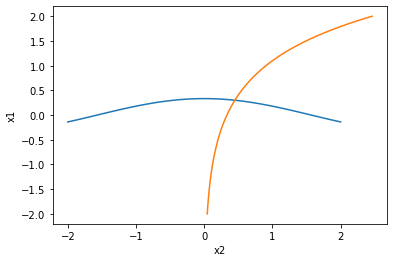

In [45]:
#Построим графики
x = np.linspace(-2,2,100)
phi1_ = []
phi2_ = []
for x_ in x:
  phi1_.append(phi1(x_))
  phi2_.append(phi2(x_))
plt.plot(x,phi1_)
plt.plot(phi2_,x)
plt.xlabel('x2')
plt.ylabel('x1')
#положительное решение находится в квадрате 0 < x2 < 1, 0 < x1 < 0.5
#за начальное приближение возьмем точку (0.5,0.5)

In [79]:
epsilon = [0.1, 0.001, 0.0001, 0.00001]

# Посчитаем решения для различных точностей методом простых итераций
print("\n\t\tSimple iterations method\n")
for eps in epsilon:
    SimpleIterationsMethod(eps, 2)


		Simple iterations method

Sufficient condition is met : q = 0.9060939428196817 < 1
x1 = 0.2996871823843739, x2 = 0.45883014826849694, on 6 iteration
Sufficient condition is met : q = 0.9060939428196817 < 1
x1 = 0.3002303299151301, x2 = 0.45003225019865695, on 9 iteration
Sufficient condition is met : q = 0.9060939428196817 < 1
x1 = 0.30014082940172965, x2 = 0.45001789487707516, on 11 iteration
Sufficient condition is met : q = 0.9060939428196817 < 1
x1 = 0.30014666976107685, x2 = 0.45001883157442907, on 13 iteration


# Метод Ньютона

Text(0, 0.5, 'x1')

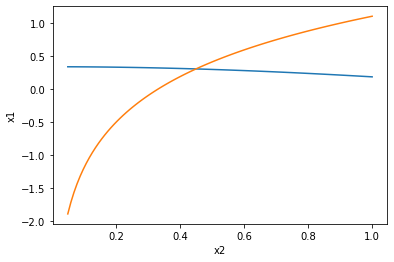

In [54]:
#Построим графики
x = np.linspace(0.05,1,100)
f1_ = []
f2_ = []
for x_ in x:
  f1_.append(f_show1(x_))
  f2_.append(f_show2(x_))
plt.plot(x,f1_)
plt.plot(x,f2_)
plt.xlabel('x2')
plt.ylabel('x1')

In [80]:
epsilon = [0.1, 0.001, 0.0001, 0.00001]

# Посчитаем решения для различных точностей методом Ньютона
print("\n\t\tNewton method\n")
for eps in epsilon:
    newtonMethod([0.5,0.5],eps, 2)


		Newton method

x1 = 0.30199528609907034, x2 = 0.44075556239759067, on 2 iteration
x1 = 0.3001585522523673, x2 = 0.45002352253691436, on 3 iteration
x1 = 0.3001585522523673, x2 = 0.45002352253691436, on 3 iteration
x1 = 0.3001463120293105, x2 = 0.45001877416844893, on 4 iteration
